### Loading the digits dataset from the datasets provided in SciKitLearn

In [5]:
from sklearn import datasets
digits = datasets.load_digits()

In [13]:
# Inspecting all keys of the dictionary
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [88]:
# Features
x = digits.data
# Labels
y = digits.target
# images
images = digits.images

### Spliting the data set into 70% training data and 30% test data.

In [36]:
# we can split it manually:
n = int(0.7 * len(x))
x_train, y_train = x[:n], y[:n]
x_test, y_test = x[n:], y[n:]

This method will always give as the same training and test sets.\
So, we can do better, by shuffling the data and getting random data sets.

In [38]:
# or using the function train_test_split provided in SciKitLearn
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test, img_tr, img_ts = train_test_split(x, y, images, test_size=0.3)

### k-NN classifier

In [90]:
# Setting up the classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, algorithm = 'brute')

Fit the model using **x_train** as training data and **y_train** as target values

In [91]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute')

#### Applying the classifier to the test data

In [92]:
y_hat = model.predict(x_test)

#### The 5 nearest neighbors and the corresponding distances in the training set for each test sample

In [93]:
distances, neighbors = model.kneighbors(x_test) 

Visualise the neighbors of a random test sample:

In [110]:
import matplotlib.pyplot as plt
import numpy as np

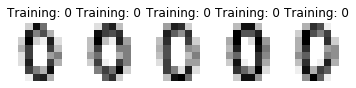

In [116]:
# Choosibg randomly an index in the test set
index = np.random.randint(len(y_test))
# indices of its 5 nearest neighbors
index_neigh = neighbors[index]

images_and_labels = list(zip(img_tr[index_neigh], y_train[index_neigh]))
for i, (image,label) in enumerate(images_and_labels):
    plt.subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

#### Evaluation of our classifier:

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.95      1.00      0.97        58
           2       0.98      1.00      0.99        55
           3       0.94      1.00      0.97        50
           4       0.98      1.00      0.99        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        58
           8       1.00      0.90      0.95        61
           9       1.00      0.96      0.98        55

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



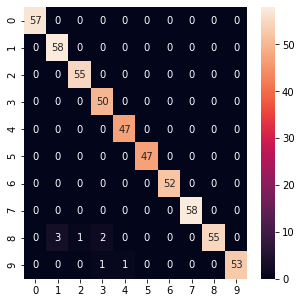

In [123]:
import pandas as pd
import seaborn as sn
cm = confusion_matrix(y_test, y_hat)
cm = pd.DataFrame(cm, index= [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True)

### Result:
We can say that our classifier performs well, since we got an accuracy of 99% on unseen data.

### k-Means 

In [128]:
# Set up
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10)
# fitting the model
cluster = model.fit(x_train)

### Visualise the found cluster centers

Here, we got 10 centers as an array of 64 elements. So in order to visualse the centers, we have to reshape it into a matrix of 8x8, then:

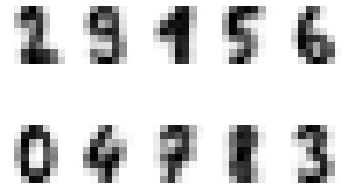

In [145]:
# Getting the cluster centers:
centers = model.cluster_centers_
for i, image in enumerate(centers):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(centers[i].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

#### Classifying our test data

In [147]:
y_hat = model.predict(x_test)

In [142]:
# Classification report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00        58
           2       0.03      0.02      0.02        55
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        52
           7       0.88      0.98      0.93        58
           8       0.48      0.62      0.54        61
           9       0.04      0.04      0.04        55

    accuracy                           0.18       540
   macro avg       0.14      0.17      0.15       540
weighted avg       0.16      0.18      0.17       540



In [144]:
# the confusion matrix
print(confusion_matrix(y_test, y_hat))

[[ 0  0  0  0  0 57  0  0  0  0]
 [ 5  0 17  0  1  0  0  0 35  0]
 [46  0  1  0  0  0  0  0  4  4]
 [ 0  4  0  0  0  0  0  1  1 44]
 [ 0  0  1  0  0  0 44  1  1  0]
 [ 0 10  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 57  0  0]
 [ 1 14  2  2  0  0  0  3 38  1]
 [ 0 40  9  1  0  0  0  3  0  2]]


The accuracy is very low 0.18 compared to the first classifier, the confusion matrix also looks bad.

In [151]:
# Predicting labels of centers of the cluster
model.predict(centers)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

##### Result: 
The images of the centers vaguely resemble the labels

#### Investigating evaluation tools

In [157]:
from sklearn.metrics import completeness_score, homogeneity_score, adjusted_mutual_info_score
cluster_labels = model.predict(x_train)

print("Completeness: ", completeness_score(y_train, cluster_labels))
print("homogeneity: ", homogeneity_score(y_train, cluster_labels))
print("mutual_info: ", adjusted_mutual_info_score(y_train, cluster_labels))

Completeness:  0.7457057123602229
homogeneity:  0.7359279808689356
mutual_info:  0.7370050475168972
